## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

C:\Users\chava\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Import csv file

In [2]:
df = pd.read_csv(r'C:\Users\chava\Downloads\goog.csv')
df

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400
...,...,...,...,...,...,...
56,3/13/2017,844.000000,848.684998,843.250000,845.539978,1149500
57,3/14/2017,843.640015,847.239990,840.799988,845.619995,779900
58,3/15/2017,847.590027,848.630005,840.770020,847.200012,1379600
59,3/16/2017,849.030029,850.849976,846.130005,848.780029,970400


## Extract the 'Close' prices and  Normalize the data

In [3]:
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [4]:
data

array([[794.200012],
       [796.419983],
       [794.559998],
       [791.26001 ],
       [789.909973],
       [791.549988],
       [785.049988],
       [782.789978],
       [771.820007],
       [786.140015],
       [786.900024],
       [794.02002 ],
       [806.150024],
       [806.650024],
       [804.789978],
       [807.909973],
       [806.359985],
       [807.880005],
       [804.609985],
       [806.070007],
       [802.174988],
       [805.02002 ],
       [819.309998],
       [823.869995],
       [835.669983],
       [832.150024],
       [823.309998],
       [802.320007],
       [796.789978],
       [795.695007],
       [798.530029],
       [801.48999 ],
       [801.340027],
       [806.969971],
       [808.380005],
       [809.559998],
       [813.669983],
       [819.23999 ],
       [820.450012],
       [818.97998 ],
       [824.159973],
       [828.070007],
       [831.659973],
       [830.76001 ],
       [831.330017],
       [828.640015],
       [829.280029],
       [823.2

## Define a function to create sequences for training

In [5]:
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i+sequence_length, 0])
        y.append(data[i+sequence_length, 0])
    return np.array(x), np.array(y)

# Choose the sequence length (e.g., number of days to look back)
sequence_length = 10

# Create sequences
x, y = create_sequences(scaled_data, sequence_length)


## Split the data into training and testing sets

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=10, batch_size=32)





Epoch 1/10

2/2 [==============================] - 8s 35ms/step - loss: 0.3382
Epoch 2/10
2/2 [==============================] - 0s 22ms/step - loss: 0.2469
Epoch 3/10
2/2 [==============================] - 0s 21ms/step - loss: 0.1610
Epoch 4/10
2/2 [==============================] - 0s 20ms/step - loss: 0.0889
Epoch 5/10
2/2 [==============================] - 0s 20ms/step - loss: 0.0368
Epoch 6/10
2/2 [==============================] - 0s 21ms/step - loss: 0.0221
Epoch 7/10
2/2 [==============================] - 0s 19ms/step - loss: 0.0459
Epoch 8/10
2/2 [==============================] - 0s 20ms/step - loss: 0.0523
Epoch 9/10
2/2 [==============================] - 0s 20ms/step - loss: 0.0353
Epoch 10/10
2/2 [==============================] - 0s 21ms/step - loss: 0.0229


## Generate predictions on the test set

In [10]:
predictions = model.predict(x_test)

1/1 [==============================] - 0s 62ms/step


## Inverse transform the predictions and actual values to get them back to the original scale

In [11]:
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

## Visualize the results 

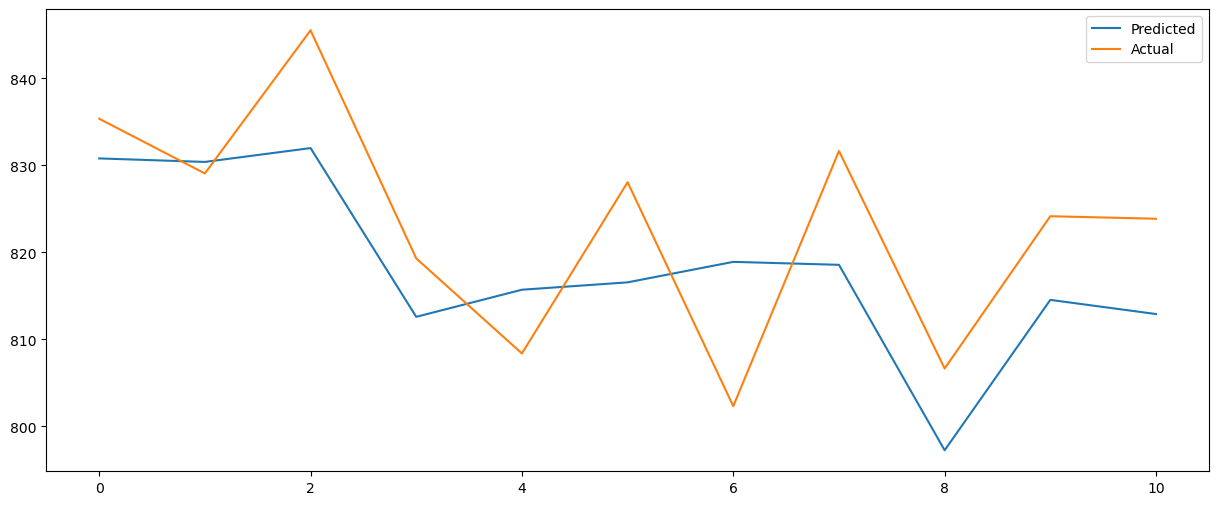

In [12]:
plt.figure(figsize=(15, 6))
plt.plot(predictions, label='Predicted')
plt.plot(y_test, label='Actual')
plt.legend()
plt.show()